In [54]:
import pathlib

import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [55]:
device

device(type='cpu')

In [56]:
r = torch.rand((2, 2))*5

v = torch.rand((2, 2))

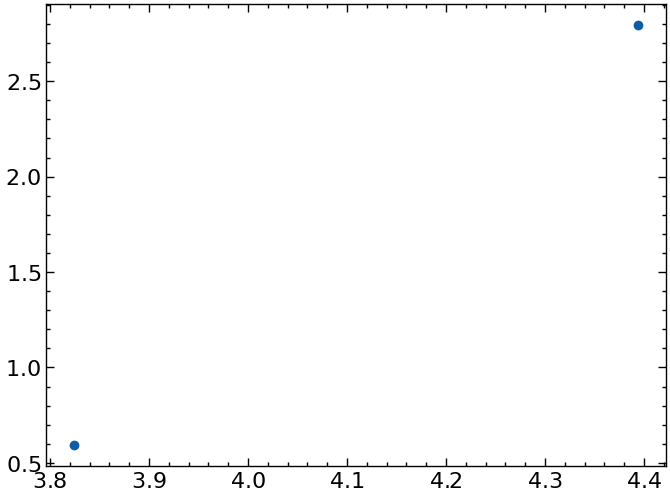

In [57]:
plt.scatter(r[0, :], r[1, :])

In [58]:
def motion(r, v, ts, dt):
    rs = torch.zeros((ts, r.shape[0], r.shape[1])).to(device)
    fs = torch.zeros((ts, r.shape[0])).to(device)
    rs[0] = r
    k = 0.05
    
    for i in range(1, ts):
        dr = r[:, 0] - r[:, 1]
        # f = k * dr / dr.norm()
        f = k * dr
        v[:, 0] -= f * dt
        v[:, 1] += f * dt
        r += v * dt
        rs[i] = r
        fs[i] = f
    
    return rs, fs

In [59]:
rs, fs = motion(r, v, ts=1000, dt=0.08)

In [60]:
rs

tensor([[[ 4.3936,  3.8242],
         [ 2.7938,  0.5929]],

        [[ 4.4499,  3.8844],
         [ 2.8683,  0.6057]],

        [[ 4.5060,  3.9448],
         [ 2.9421,  0.6193]],

        ...,

        [[62.4619, 61.9080],
         [46.4647, 44.0506]],

        [[62.5175, 61.9689],
         [46.5366, 44.0661]],

        [[62.5730, 62.0299],
         [46.6076, 44.0825]]])

In [61]:
fs

tensor([[0.0000, 0.0000],
        [0.0285, 0.1100],
        [0.0283, 0.1131],
        ...,
        [0.0279, 0.1178],
        [0.0277, 0.1207],
        [0.0274, 0.1235]])

MovieWriter ffmpeg unavailable; using Pillow instead.


i=0
i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=109
i=110
i=111
i=112
i=113
i=114
i=115
i=116
i=117
i=118
i=119
i=120
i=121
i=122
i=123
i=124
i=125
i=126
i=127
i=128
i=129
i=130
i=131
i=132
i=133
i=134
i=135
i=136
i=137
i=138
i=139
i=140
i=141
i=142
i=143
i=144
i=145
i=146
i=147
i=148
i=149
i=150
i=151
i=152
i=153
i=154
i=155
i=156
i=157
i=158
i=159
i=160
i=161
i=162
i=163
i=164
i=165
i=166
i=167
i=168
i=169
i=170
i=171
i=172
i=173
i=174
i=175
i=176
i=177
i=178
i=179
i=180
i=181
i=182
i=183
i=

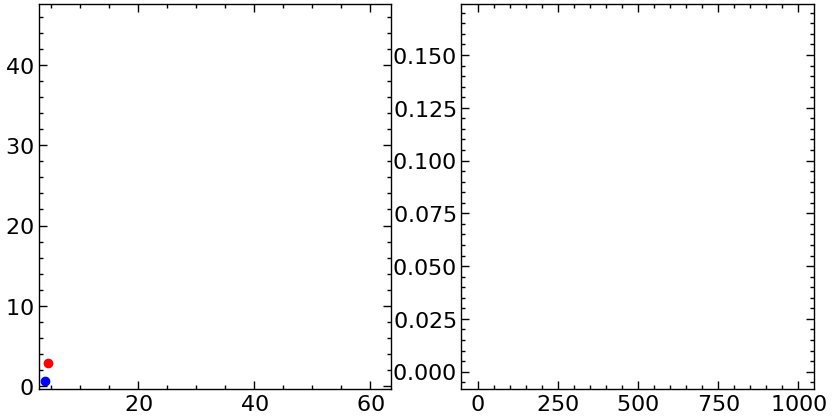

In [81]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].clear()
ax[1].clear()
vmin = 0
vmax = 1

x_lim = (torch.min(rs[:, 0, :]).cpu() - 1, torch.max(rs[:, 0, :]).cpu() + 1)
y_lim = (torch.min(rs[:, 1, :]).cpu() - 1, torch.max(rs[:, 1, :]).cpu() + 1)

markersize = 10
red, = ax[0].plot([], [], 'o', color='red', markersize=markersize)
blue, = ax[0].plot([], [], 'o', color='blue', markersize=markersize)
force, = ax[1].plot([], [], color='k')

def animate(i):
    print(f"{i=}")
    xred, yred = rs[i][0][0:1].cpu(), rs[i][1][0:1].cpu()
    xblue, yblue = rs[i][0][1:2].cpu(),rs[i][1][1:2].cpu()
    # red.set_data(xred, yred)
    # blue.set_data(xblue, yblue)
    # force.set_data(np.arange(1_000)[0:i], fs.norm(dim=1).cpu()[0:i])
    # return [(red, blue), force]
    
    ax[0].clear()
    ax[1].clear()
    
    ax[0].scatter(xred, yred, color='red')
    ax[0].scatter(xblue, yblue, color='blue')
    ax[1].plot(np.arange(1_000)[0:i], fs.norm(dim=1).cpu()[0:i])

    ax[0].set_xlim(x_lim)
    ax[0].set_ylim(y_lim)

# writer = animation.FFMpegWriter(fps=30)
ani = animation.FuncAnimation(fig, animate, frames=1_000, interval=25, blit=False)
path = pathlib.Path('./ani3.gif')
ani.save(path, dpi=100)

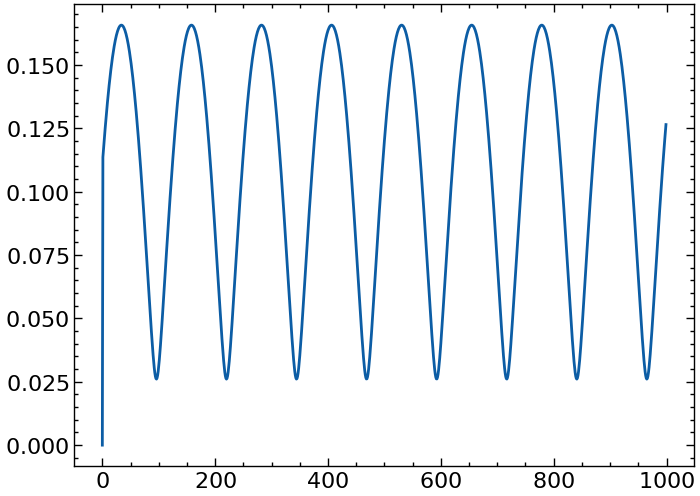

In [63]:
plt.plot(np.arange(1_000)[0:], fs.norm(dim=1).cpu()[0:])

In [64]:
fs.norm(dim=1).shape

torch.Size([1000])

In [65]:
fs.norm(dim=1).cpu()[0:10]

tensor([0.0000, 0.1137, 0.1166, 0.1195, 0.1223, 0.1250, 0.1277, 0.1303, 0.1328,
        0.1352])